У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('~/Documents/data/yulu_rental.csv')
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


1. Чи є зв'язок між швидкістю вітру та оренд. велосип.? Чи є різні тенденції оренди між випадковими та регулярними користувачами?

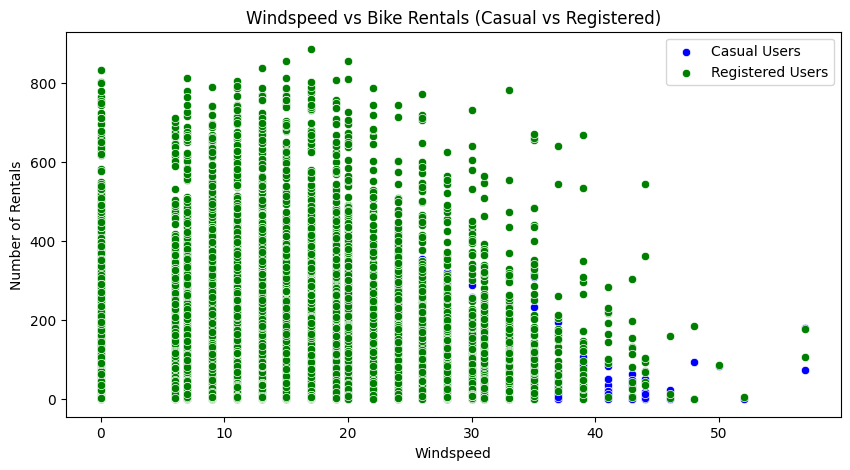

In [4]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='windspeed', y='casual', data=df, color='blue', label='Casual Users')
sns.scatterplot(x='windspeed', y='registered', data=df, color='green', label='Registered Users')
plt.title('Windspeed vs Bike Rentals (Casual vs Registered)')
plt.xlabel('Windspeed')
plt.ylabel('Number of Rentals')
plt.legend()
plt.show()

Ми можемо побачити, що кількість випадків оренди серед випадкових користувачів є меншою, ніж серед зареєстрованих користувачів, які користуються послугами Yulu. Однак, здається, що швидкість вітру має вплив на людей, і коли вона перевищує 20 км/год, ми спостерігаємо тенденцію до зниження оренди велосипедів.

2. Сезон впливає на оренду велосипедів однаково для зареєстрованих та випадкових користувачів.

<Figure size 1000x500 with 0 Axes>

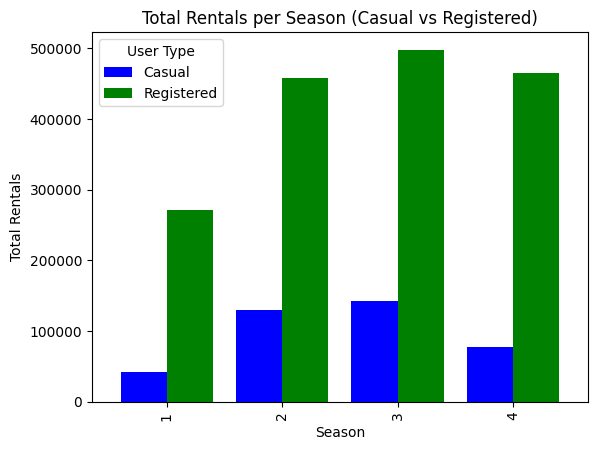

In [18]:
season_rentals = df.groupby('season')[['casual', 'registered']].sum()
plt.figure(figsize=(10, 5))
season_rentals.plot(kind='bar', width=0.8, color=['blue', 'green'])
plt.title('Total Rentals per Season (Casual vs Registered)')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend(title='User Type', labels=['Casual', 'Registered']);

Дійсно, ми можемо побачити ту ж саму тенденцію між зареєстрованими та випадковими користувачами в оренді велосипедів у різні сезони.

3. Під час поганої погоди ніхто не орендує велосипеди, ані зареєстровані користувачі, ані звичайні.

Text(0, 0.5, 'Total Rentals')

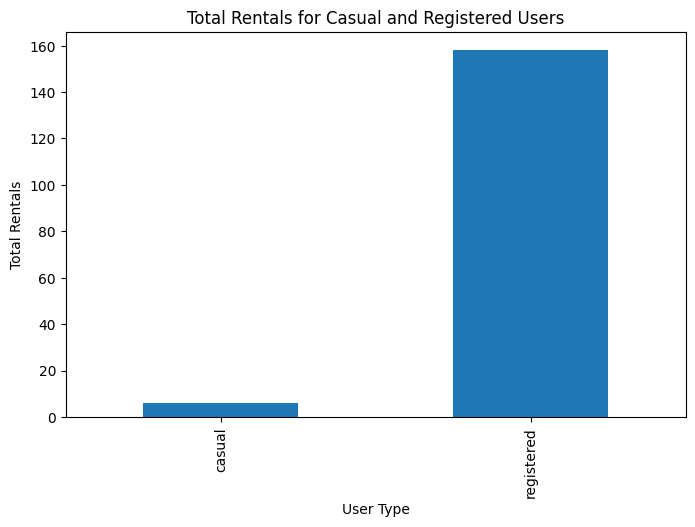

In [38]:
df_weather_4 = df[df['weather'] == 4]
total_rentals = df_weather_4[['casual', 'registered']].sum()
total_rentals.plot(kind='bar', figsize=(8, 5))
plt.title('Total Rentals for Casual and Registered Users')
plt.xlabel('User Type')
plt.ylabel('Total Rentals')

In [ ]:
Навіть під час поганої погоди є люди, які орендують велосипедиМожливо, у випадку терміновості погана погода не є перешкодою.